# GAN_2D_Example

In [62]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable

## Prepare Data

Text(0,0.5,'y1')

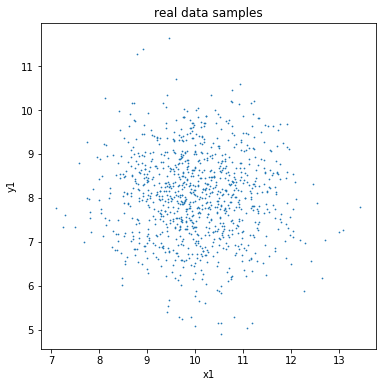

In [63]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define VAE model

In [64]:
# Discriminator
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid())

# Generator
z_dim = 10
G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(20, 2))

D.cuda()
G.cuda()

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=20, out_features=2, bias=True)
)

## Training GAN Model

In [65]:
batch_size = 300

#a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    x_gen = G(z).detach().cpu().numpy()
    
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['GAN','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

In [66]:
max_epoch = 100000

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
#criterion = nn.MSELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100000], d_loss: 5.3950, g_loss: 0.7065, D(x): 0.01, D(G(z)): 0.01


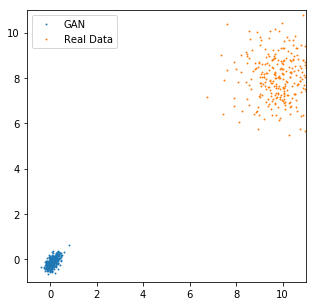

mean=[ 0.09490963 -0.12865934], std=[0.17108597 0.21741576]
Epoch [500/100000], d_loss: 3.4932, g_loss: 0.6056, D(x): 0.07, D(G(z)): 0.07


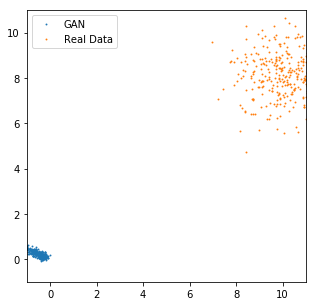

mean=[-0.5246511   0.23281166], std=[0.24613823 0.1393083 ]
Epoch [1000/100000], d_loss: 2.0120, g_loss: 0.6090, D(x): 0.29, D(G(z)): 0.29


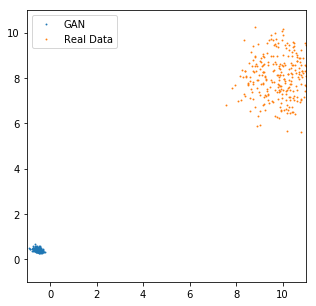

mean=[-0.5137469   0.40084732], std=[0.10231158 0.06617102]
Epoch [1500/100000], d_loss: 1.2523, g_loss: 0.5951, D(x): 0.64, D(G(z)): 0.64


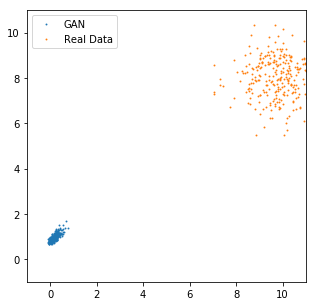

mean=[0.19734335 0.96951723], std=[0.14243509 0.15950778]
Epoch [2000/100000], d_loss: 1.1131, g_loss: 0.5342, D(x): 0.79, D(G(z)): 0.79


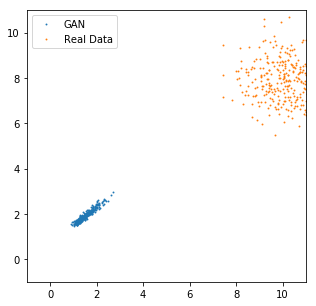

mean=[1.5301596 1.936827 ], std=[0.3286034 0.274763 ]
Epoch [2500/100000], d_loss: 1.2703, g_loss: 0.4485, D(x): 0.78, D(G(z)): 0.78


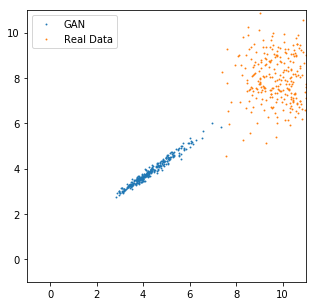

mean=[4.310303 3.873606], std=[0.8043409 0.588349 ]
Epoch [3000/100000], d_loss: 1.3532, g_loss: 0.5244, D(x): 0.63, D(G(z)): 0.63


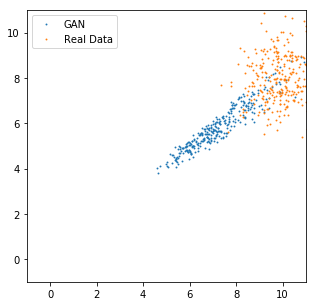

mean=[7.225498 5.840367], std=[1.2727416  0.98480093]
Epoch [3500/100000], d_loss: 1.3857, g_loss: 0.6496, D(x): 0.52, D(G(z)): 0.52


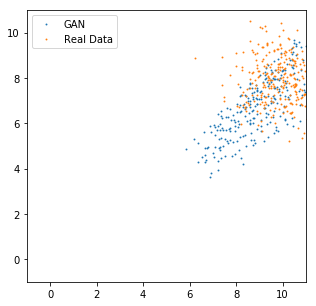

mean=[9.522812 7.28956 ], std=[1.8264393 1.8538332]
Epoch [4000/100000], d_loss: 1.3959, g_loss: 0.7294, D(x): 0.48, D(G(z)): 0.48


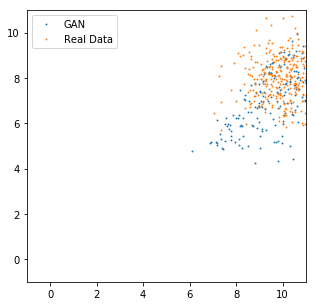

mean=[10.991714  8.384596], std=[2.251529  2.3273463]
Epoch [4500/100000], d_loss: 1.3921, g_loss: 0.7627, D(x): 0.47, D(G(z)): 0.47


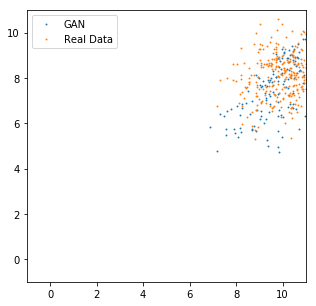

mean=[11.455452  9.042312], std=[2.07698  2.228385]
Epoch [5000/100000], d_loss: 1.3886, g_loss: 0.7546, D(x): 0.47, D(G(z)): 0.47


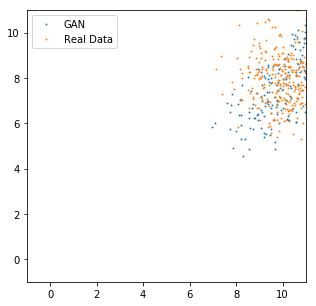

mean=[11.255069  8.861508], std=[2.0303752 2.221237 ]
Epoch [5500/100000], d_loss: 1.3865, g_loss: 0.7314, D(x): 0.48, D(G(z)): 0.48


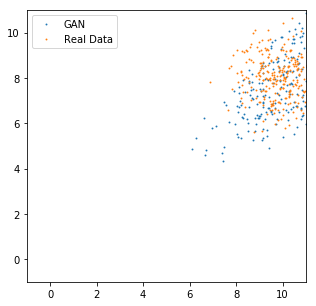

mean=[10.716176   8.5213175], std=[1.9571234 2.2612724]
Epoch [6000/100000], d_loss: 1.3896, g_loss: 0.7128, D(x): 0.49, D(G(z)): 0.49


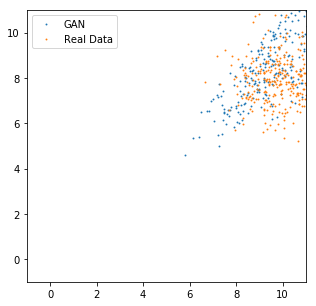

mean=[10.183036  9.074388], std=[1.9542013 2.0451832]
Epoch [6500/100000], d_loss: 1.3717, g_loss: 0.6982, D(x): 0.50, D(G(z)): 0.50


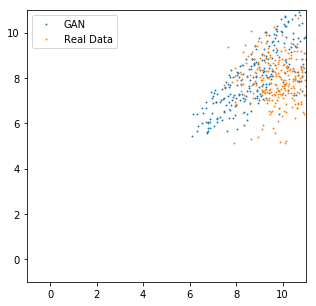

mean=[9.451663 8.647017], std=[1.7431248 1.8508059]


KeyboardInterrupt: 

In [67]:
for epoch in range(max_epoch):
    
    # Build mini-batch dataset
    x = Variable(sample_real(batch_size)).cuda()

    # Create the labels which are later used as input for the BCE loss
    real_labels = Variable(torch.ones(batch_size,1)).cuda()
    fake_labels = Variable(torch.zeros(batch_size,1)).cuda()


    #============= Train the discriminator =============#
    # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
    # Second term of the loss is always zero since real_labels == 1    
    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Compute BCELoss using fake images
    # First term of the loss is always zero since fake_labels == 0    
    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z).detach()
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop + Optimize
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    #=============== Train the generator ===============#
    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z)
    outputs = D(fake_images)

    # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
    g_loss = criterion(outputs, real_labels)

    # Backprop + Optimize
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch%500==0:
#         print('epoch={}, loss={}'.format(epoch,loss.data.numpy()[0]))
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, max_epoch, d_loss.item(), g_loss.item(), real_score.mean().item(), real_score.mean().item()))

    if epoch%500==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
